In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
fname = r'D:\mypythons\jupyters\phd\one_storey_frame\drain\onest\bare\out'

with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
# content = [x.strip() for x in content]

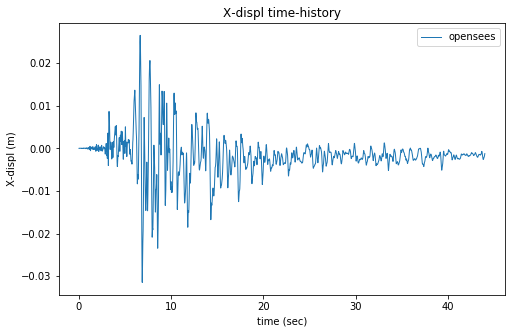

In [15]:
node_xdipl_indices = [i for i, elem in enumerate(content) if 'X-DISPLACEMENTS AT NODES, TIME =' in elem]

time_values = [float(content[i][33:]) for i in node_xdipl_indices]
xdispl = [float(content[i+3][19:28]) for i in node_xdipl_indices]

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(time_values, xdispl, label="opensees", lw=1)
# ax.axis([0, 0.1, 0, 500.])
ax.set_title('X-displ time-history')
ax.set_ylabel('X-displ (m)')
ax.set_xlabel('time (sec)')
ax.legend()
fig = (f, ax)
plt.show()

In [16]:
elements_gr1_results_indices = [i for i, elem in enumerate(content) if 'RESULTS FOR GROUP  1 R.C. BEAM ELEMENTS TIME =' in elem]
beam_nodei_results = [content[i+6][10:].split() for i in elements_gr1_results_indices]
beam_nodej_results = [content[i+7][10:].split() for i in elements_gr1_results_indices]

elements_gr2_results_indices = [i for i, elem in enumerate(content) if 'RESULTS FOR GROUP  2 R.C. BEAM ELEMENTS TIME =' in elem]
col1_nodei_results = [content[i+6][10:].split() for i in elements_gr2_results_indices]
col1_nodej_results = [content[i+7][10:].split() for i in elements_gr2_results_indices]
col2_nodei_results = [content[i+8][10:].split() for i in elements_gr2_results_indices]
col2_nodej_results = [content[i+9][10:].split() for i in elements_gr2_results_indices]

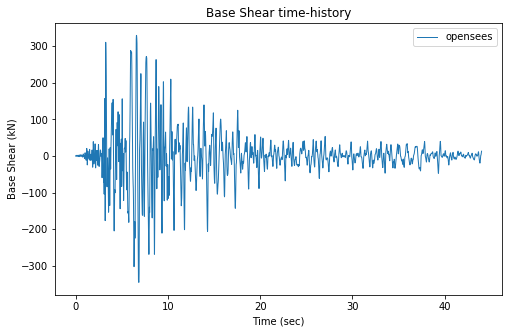

In [17]:
base_shears = np.array(col1_nodei_results).transpose().astype(np.float)[3] + \
              np.array(col2_nodei_results).transpose().astype(np.float)[3]

f, ax = plt.subplots(figsize=(8, 5))
ax.plot([0] + time_values, base_shears, label="opensees", lw=1)
# ax.axis([0, 0.1, 0, 500.])
ax.set_title('Base Shear time-history')
ax.set_ylabel('Base Shear (kN)')
ax.set_xlabel('Time (sec)')
ax.legend()
fig = (f, ax)
plt.show()

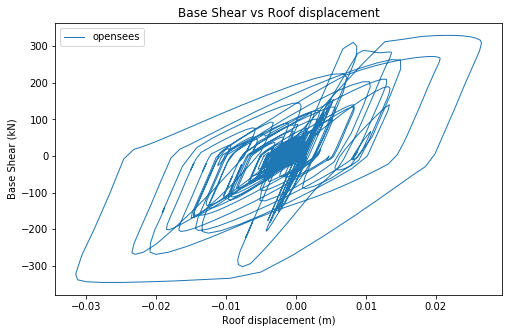

In [18]:
# etabs_curve = pd.read_csv('etabs/02_userdefined.pushcurve', skiprows=7, sep='\s+')
# etabs_d = etabs_curve['Displacement'].tolist()
# etabs_V = etabs_curve['Base'].tolist()

f, ax = plt.subplots(figsize=(8, 5))
ax.plot([0] + xdispl, base_shears, label="opensees", lw=1)
# ax.plot(etabs_d, etabs_V, label="etabs", lw=2)
# ax.axis([0, 0.1, 0, 500.])
ax.set_title('Base Shear vs Roof displacement')
ax.set_ylabel('Base Shear (kN)')
ax.set_xlabel('Roof displacement (m)')
ax.legend()
fig = (f, ax)
plt.show()

In [19]:
col1_nodei_results = [content[i+6][10:].split() for i in elements_gr2_results_indices]
col1_nodej_results = [content[i+7][10:].split() for i in elements_gr2_results_indices]
col2_nodei_results = [content[i+8][10:].split() for i in elements_gr2_results_indices]
col2_nodej_results = [content[i+9][10:].split() for i in elements_gr2_results_indices]

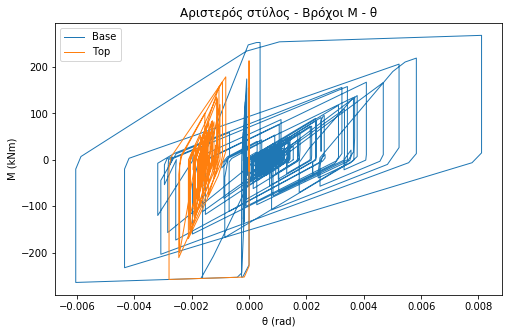

In [20]:
col1_Mi = np.array(col1_nodei_results).transpose().astype(np.float)[2]
col1_thetai = np.array(col1_nodei_results).transpose().astype(np.float)[5]
col1_Mj = np.array(col1_nodej_results).transpose().astype(np.float)[2]
col1_thetaj = np.array(col1_nodej_results).transpose().astype(np.float)[5]

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(col1_thetai, col1_Mi, label="Base", lw=1)
ax.plot(col1_thetaj, col1_Mj, label="Top", lw=1)
ax.set_title('Αριστερός στύλος - Βρόχοι M - θ')
ax.set_ylabel('M (kNm)')
ax.set_xlabel('θ (rad)')
ax.legend()
fig = (f, ax)
plt.show()

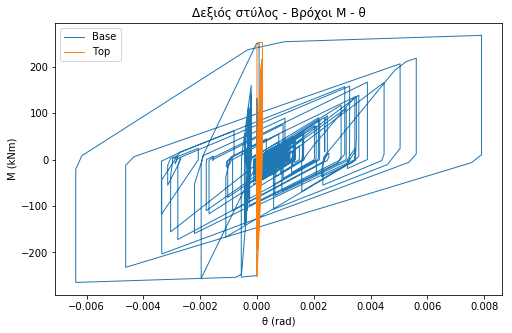

In [21]:
col2_Mi = np.array(col2_nodei_results).transpose().astype(np.float)[2]
col2_thetai = np.array(col2_nodei_results).transpose().astype(np.float)[5]
col2_Mj = np.array(col2_nodej_results).transpose().astype(np.float)[2]
col2_thetaj = np.array(col2_nodej_results).transpose().astype(np.float)[5]

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(col2_thetai, col2_Mi, label="Base", lw=1)
ax.plot(col2_thetaj, col2_Mj, label="Top", lw=1)
ax.set_title('Δεξιός στύλος - Βρόχοι M - θ')
ax.set_ylabel('M (kNm)')
ax.set_xlabel('θ (rad)')
ax.legend()
fig = (f, ax)
plt.show()

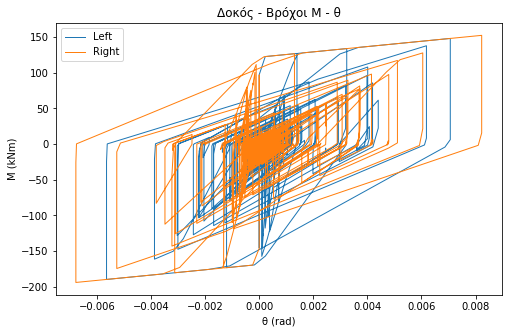

In [22]:
beam_Mi = np.array(beam_nodei_results).transpose().astype(np.float)[2]
beam_thetai = np.array(beam_nodei_results).transpose().astype(np.float)[5]
beam_Mj = np.array(beam_nodej_results).transpose().astype(np.float)[2]
beam_thetaj = np.array(beam_nodej_results).transpose().astype(np.float)[5]

f, ax = plt.subplots(figsize=(8, 5))
ax.plot(beam_thetai, beam_Mi, label="Left", lw=1)
ax.plot(beam_thetaj, beam_Mj, label="Right", lw=1)
ax.set_title('Δοκός - Βρόχοι M - θ')
ax.set_ylabel('M (kNm)')
ax.set_xlabel('θ (rad)')
ax.legend()
fig = (f, ax)
plt.show()